# 0. 환경설정

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 시각화 관련
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from PIL import Image
from matplotlib import rc

In [53]:
# 맥 matplotlib 한글 깨짐 방지
from matplotlib import rc
#rc('font', family='AppleGothic')
rc('font', family='AppleSDGothicNeo')
plt.rcParams['axes.unicode_minus'] = False

In [4]:
os.chdir("/Users/yeorii/Desktop/대외활동/공모전/2210빅캠/데이터/보행자전용도로")

# 1. 데이터 불러오기 및 전처리

In [5]:
강남구 = pd.read_csv("서울특별시_강남구_보행자전용도로_20221004.csv", encoding='cp949')
print(강남구.shape)

(2, 33)


In [6]:
강북구 = pd.read_csv("서울특별시_강북구_보행자전용도로_20220421_1650540478903_1015.csv", encoding='cp949')
print(강북구.shape)

(2, 33)


In [7]:
강서구 = pd.read_csv("서울특별시_강서구_보행자전용도로_20220208_1644306777392_1631.csv", encoding='cp949')
print(강서구.shape)

(5, 33)


In [8]:
관악구 = pd.read_csv("서울특별시_관악구_보행자전용도로_20210913_1631499024426_3069.csv", encoding='cp949')
print(관악구.shape)

(11, 33)


In [9]:
구로구 = pd.read_csv("서울특별시_구로구_보행자전용도로_20220630.csv", encoding='cp949')
print(구로구.shape)

(2, 33)


In [10]:
노원구 = pd.read_csv("서울특별시_노원구_보행자전용도로_20220817.csv", encoding='cp949')
print(노원구.shape)

(4, 33)


In [11]:
동작구 = pd.read_csv("서울특별시_동작구_보행자전용도로_20220707.csv", encoding='cp949')
print(동작구.shape)

(7, 33)


In [12]:
마포구 = pd.read_csv("서울특별시_마포구_보행자전용도로_20220419_1650421944293_984.csv", encoding='cp949')
print(마포구.shape)

(2, 33)


In [13]:
서대문구 = pd.read_csv("서울특별시_서대문구_보행자전용도로_20200917_1600322811562_771.csv", encoding='cp949')
print(서대문구.shape)

(1, 33)


In [14]:
서초구 = pd.read_csv("서울특별시_서초구_보행자전용도로_20220822.csv", encoding='cp949')
print(서초구.shape)

(1, 33)


In [15]:
성동구 = pd.read_csv("서울특별시_성동구_보행자전용도로_20220609.csv", encoding='cp949')
print(성동구.shape)

(2, 33)


In [16]:
송파구 = pd.read_csv("서울특별시_송파구_보행자전용도로_20200220_1609300073291_1007.csv", encoding='cp949')
print(송파구.shape)

(2, 33)


In [17]:
양천구 = pd.read_csv("서울특별시_양천구_보행자전용도로_20220412_1649737438032_1750.csv", encoding='cp949')
print(양천구.shape)

(5, 33)


In [18]:
영등포구 = pd.read_csv("서울특별시_영등포구_보행자전용도로_20220627.csv", encoding='cp949')
print(영등포구.shape)

(17, 33)


In [19]:
용산구 = pd.read_csv("서울특별시_용산구_보행자전용도로_20220829.csv", encoding='cp949')
print(용산구.shape)

(3, 33)


In [20]:
종로구 = pd.read_csv("서울특별시_종로구_보행자전용도로_20220413_1649829276419_2856.csv", encoding='cp949')
print(종로구.shape)

(11, 33)


In [21]:
중구 = pd.read_csv("서울특별시_중구_보행자전용도로_20220414_1649902017839_3035.csv", encoding='cp949')
print(중구.shape)

(12, 33)


In [22]:
강남구.shape[0] + 강북구.shape[0] + 강서구.shape[0] + 관악구.shape[0] \
    + 구로구.shape[0] + 노원구.shape[0] + 동작구.shape[0] + 마포구.shape[0] + \
    서대문구.shape[0] + 서초구.shape[0] + 성동구.shape[0] + 송파구.shape[0] + \
    양천구.shape[0] + 영등포구.shape[0] + 용산구.shape[0] + 종로구.shape[0] + \
    중구.shape[0]

89

In [23]:
road = pd.concat([강남구, 강북구, 강서구, 관악구, 구로구, 노원구, 동작구, 마포구, 서대문구, \
    서초구, 성동구, 송파구, 양천구, 영등포구, 용산구, 종로구, 중구])
print(road.shape)
road.head()

(89, 33)


,보행자전용도로명,시도명,시군구명,법정동명,지정일자,운영방식구분,평일운영시작시각,평일운영종료시각,주말운영시작시각,주말운영종료시각,보행자전용도로시작점위도,보행자전용도로시작점경도,보행자전용도로종료점위도,보행자전용도로종료점경도,자전거보행자겸용도로구분,보행자전용도로폭,보차분리여부,지정목적,관리점검일자,관리점검결과,유지보수내용,영상정보기처리기기설치개수,보안등설치개수,횡단보도설치개수,방호울타리설치개수,차량진입억제용말뚝설치개수,속도저감시설설치개수,교통표지판설치개수,이정표설치개수,점자블럭설치개수,관리기관명,관리기관전화번호,데이터기준일자
0,개포종합시장보행전용거리1,서울특별시,강남구,개포동,2016-09-26,전일제,00:00,23:59,00:00,23:59,37.488996,127.067829,37.488589,127.068024,NaN,556.0,NaN,보행환경개선,2020-06-10,합격,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강남구청,02-3423-6407,2022-10-04
1,개포종합시장보행전용거리2,서울특별시,강남구,개포동,2016-09-26,전일제,00:00,23:59,00:00,23:59,37.488614,127.067274,37.489006,127.068666,NaN,556.0,NaN,보행환경개선,2020-06-10,합격,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강남구청,02-3423-6407,2022-10-04
0,한천로 162길,서울특별시,강북구,수유동,2016-08-01,전일제,00:00,23:59,00:00,23:59,37.645762,127.019172,37.645978,127.019512,NaN,7.0,N,안전한 보행로 확보,2020-06-01,합격,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,서울특별시 강북구청,02-901-5922,2022-04-21
1,솔샘로50길 4,서울특별시,강북구,미아동,2016-08-01,전일제,00:00,23:59,00:00,23:59,37.619706,127.019121,37.619579,127.019166,NaN,6.0,N,안전한 보행로 확보,2020-06-01,합격,NaN,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,서울특별시 강북구청,02-901-5922,2022-04-21
0,우장산공원길,서울특별시,강서구,우장산동,2010-11-06,주말제,00:00,00:00,06:00,20:00,37.552739,126.844406,37.549109,126.842569,NaN,5.0,Y,보행환경개선,2017-07-13,합격,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,서울특별시 강서구청,02-2600-4137,2022-02-08


In [24]:
road.describe()

,보행자전용도로시작점위도,보행자전용도로시작점경도,보행자전용도로종료점위도,보행자전용도로종료점경도,보행자전용도로폭,영상정보기처리기기설치개수,보안등설치개수,횡단보도설치개수,방호울타리설치개수,차량진입억제용말뚝설치개수,속도저감시설설치개수,교통표지판설치개수,이정표설치개수,점자블럭설치개수
count,89.000000,88.000000,89.000000,88.000000,89.000000,45.000000,31.000000,43.000000,31.000000,43.000000,43.0,43.000000,42.0,42.0
mean,37.536920,126.953195,37.536634,126.953561,19.730337,0.111111,3.064516,0.255814,0.193548,1.488372,0.0,2.395349,0.0,0.0
std,0.043816,0.065438,0.043654,0.065579,81.847352,0.382707,2.827667,1.002212,0.542792,2.282147,0.0,1.590740,0.0,0.0
min,37.475495,126.816592,37.473984,126.815447,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
25%,37.502147,126.903713,37.501891,126.903650,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.0,0.0
50%,37.530780,126.954013,37.531755,126.955757,6.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,2.000000,0.0,0.0
75%,37.563651,126.991175,37.563772,126.991921,8.000000,0.000000,4.500000,0.000000,0.000000,2.500000,0.0,3.000000,0.0,0.0
max,37.667691,127.152273,37.665465,127.149922,556.000000,2.000000,12.000000,6.000000,2.000000,8.000000,0.0,10.000000,0.0,0.0


In [26]:
road.dtypes

보행자전용도로명          object
시도명               object
시군구명              object
법정동명              object
지정일자              object
운영방식구분            object
평일운영시작시각          object
평일운영종료시각          object
주말운영시작시각          object
주말운영종료시각          object
보행자전용도로시작점위도     float64
보행자전용도로시작점경도     float64
보행자전용도로종료점위도     float64
보행자전용도로종료점경도     float64
자전거보행자겸용도로구분      object
보행자전용도로폭         float64
보차분리여부            object
지정목적              object
관리점검일자            object
관리점검결과            object
유지보수내용            object
영상정보기처리기기설치개수    float64
보안등설치개수          float64
횡단보도설치개수         float64
방호울타리설치개수        float64
차량진입억제용말뚝설치개수    float64
속도저감시설설치개수       float64
교통표지판설치개수        float64
이정표설치개수          float64
점자블럭설치개수         float64
관리기관명             object
관리기관전화번호          object
데이터기준일자           object
dtype: object

In [27]:
road.columns

Index(['보행자전용도로명', '시도명', '시군구명', '법정동명', '지정일자', '운영방식구분', '평일운영시작시각',
       '평일운영종료시각', '주말운영시작시각', '주말운영종료시각', '보행자전용도로시작점위도', '보행자전용도로시작점경도',
       '보행자전용도로종료점위도', '보행자전용도로종료점경도', '자전거보행자겸용도로구분', '보행자전용도로폭', '보차분리여부',
       '지정목적', '관리점검일자', '관리점검결과', '유지보수내용', '영상정보기처리기기설치개수', '보안등설치개수',
       '횡단보도설치개수', '방호울타리설치개수', '차량진입억제용말뚝설치개수', '속도저감시설설치개수', '교통표지판설치개수',
       '이정표설치개수', '점자블럭설치개수', '관리기관명', '관리기관전화번호', '데이터기준일자'],
      dtype='object')

In [39]:
차없길 = road[['보행자전용도로명', '시군구명', '법정동명', '지정일자', '운영방식구분', \
    '지정목적', '데이터기준일자']]

In [40]:
차없길['지정일자'] = 차없길['지정일자'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [41]:
차없길.지정일자.head()

0   2016-09-26
1   2016-09-26
0   2016-08-01
1   2016-08-01
0   2010-11-06
Name: 지정일자, dtype: datetime64[ns]

In [62]:
차없길.sort_values('지정일자')

,보행자전용도로명,시군구명,법정동명,지정일자,운영방식구분,지정목적,데이터기준일자
0,인사동길,종로구,인사동,1997-04-13,전일제,문화,2022-04-13
1,관철동길,종로구,관철동,1997-10-07,전일제,문화,2022-04-13
2,낙원동길,종로구,낙원동,1999-10-17,주말제,상업,2022-04-13
3,대명길,종로구,혜화동,2001-06-01,주말제,문화,2022-04-13
4,마로니에길,종로구,동숭동,2004-05-01,주말제,문화,2022-04-13
3,당현천 차없는거리,노원구,중계동,2007-03-03,주말제,쾌적한보행환경+휴식공간제공,2022-08-17
0,관악로30길,관악구,봉천동,2008-09-22,주말제,보행편의증진,2021-09-13
2,우이천길 차없는거리,노원구,상계동,2008-10-25,주말제,쾌적한보행환경+휴식공간제공,2022-08-17
2,안양천로(목5동 이대목동병원),양천구,목5동,2009-05-01,전일제,안전한 보행로 확보,2022-04-12
1,안양천로(목5동 목동교),양천구,목5동,2009-05-01,전일제,안전한 보행로 확보,2022-04-12


In [44]:
차없길필터링 = 차없길.sort_values('지정일자').set_index('지정일자')
차없길필터링['2016' : '2017']

,보행자전용도로명,시군구명,법정동명,운영방식구분,지정목적,데이터기준일자
지정일자,,,,,,
2016-07-13,선유로43나길,영등포구,양평2동,전일제,보행자 안전,2022-06-27
2016-08-01,신정로(계남근린공원),양천구,신정3동,전일제,안전한 보행로 확보,2022-04-12
2016-08-01,솔샘로50길 4,강북구,미아동,전일제,안전한 보행로 확보,2022-04-21
2016-08-01,한천로 162길,강북구,수유동,전일제,안전한 보행로 확보,2022-04-21
2016-08-01,용왕정길(용왕산근린공원),양천구,목2동,전일제,안전한 보행로 확보,2022-04-12
2016-09-09,마조로3가길,성동구,사근동,주말제,보행환경개선,2022-06-09
2016-09-24,용산 선인전자상가,용산구,한강로2가,주말제,상권 활성화,2022-08-29
2016-09-26,개포종합시장보행전용거리1,강남구,개포동,전일제,보행환경개선,2022-10-04
2016-09-26,개포종합시장보행전용거리2,강남구,개포동,전일제,보행환경개선,2022-10-04


In [45]:
road.지정목적.unique()

array(['보행환경개선', '안전한 보행로 확보', '보행편의증진', '교통량감축+대기환경개선', '쾌적한보행환경+휴식공간제공',
       '지역상권활성화+보행환경개선', '상권활성화', '보행자 안전', '시장방문 보행자 편의', '상권 활성화', '문화',
       '상업'], dtype=object)

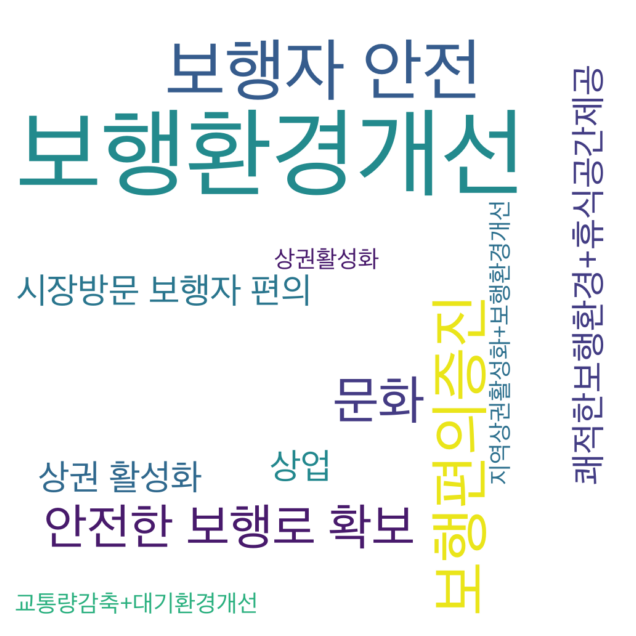

In [55]:
#빈도를 바탕으로 워드클라우드도 그려볼게요 
#head(100)은 상위 100개 단어를 그려달라는 뜻입니다
#숫자 조정을 통해 표현하고 싶은 단어 갯수를 설정할 수 있어요

from wordcloud import WordCloud
wc = WordCloud(font_path = '/Library/Fonts/AppleSDGothicNeo', \
    background_color='white', width=1000, height=1000)
cloud = wc.generate_from_frequencies(road.지정목적.value_counts())
#cloud = wc.generate_from_frequencies(all_texts.value_counts())
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud, interpolation="bilinear")
plt.show()

In [61]:
road.groupby('지정목적').size().sort_values(ascending=False)

지정목적
보행환경개선            34
보행자 안전            14
보행편의증진            11
문화                 8
안전한 보행로 확보         7
상권 활성화             3
상업                 3
시장방문 보행자 편의        3
쾌적한보행환경+휴식공간제공     3
교통량감축+대기환경개선       1
상권활성화              1
지역상권활성화+보행환경개선     1
dtype: int64

In [69]:
목적 = road
목적.지정목적[목적.지정목적=='안전한 보행로 확보'] = '보행자 안전'
목적.지정목적[(목적.지정목적=='상권활성화')|(목적.지정목적=='상업')] = '상권 활성화'
목적.지정목적[목적.지정목적=='지역상권활성화+보행환경개선'] = '상권 활성화' + '\n' + '보행환경개선'
목적.지정목적[목적.지정목적=='쾌적한보행환경+휴식공간제공'] = '보행환경개선' + '\n' + '휴식공간제공'
목적.지정목적[목적.지정목적=='교통량감축+대기환경개선'] = '교통량 감축' + '\n' + '대기환경 개선'

목적.groupby('지정목적').size().sort_values(ascending=False)

지정목적
보행환경개선             34
보행자 안전             21
보행편의증진             11
문화                  8
상권 활성화              7
보행환경개선\n휴식공간제공      3
시장방문 보행자 편의         3
교통량 감축\n대기환경 개선     1
상권 활성화\n보행환경개선      1
dtype: int64

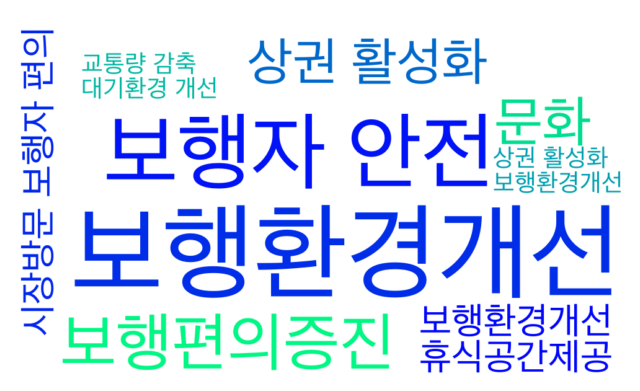

In [118]:
#빈도를 바탕으로 워드클라우드도 그려볼게요 
#head(100)은 상위 100개 단어를 그려달라는 뜻입니다
#숫자 조정을 통해 표현하고 싶은 단어 갯수를 설정할 수 있어요

from wordcloud import WordCloud
wc = WordCloud(font_path = '/Library/Fonts/AppleSDGothicNeo', \
    background_color='white', width=1000, height=600, \
    colormap = 'winter')
cloud = wc.generate_from_frequencies(목적.지정목적.value_counts())
#cloud = wc.generate_from_frequencies(all_texts.value_counts())
plt.figure(figsize=(8, 6))
plt.axis('off')
plt.imshow(cloud, interpolation="bilinear")
plt.show()

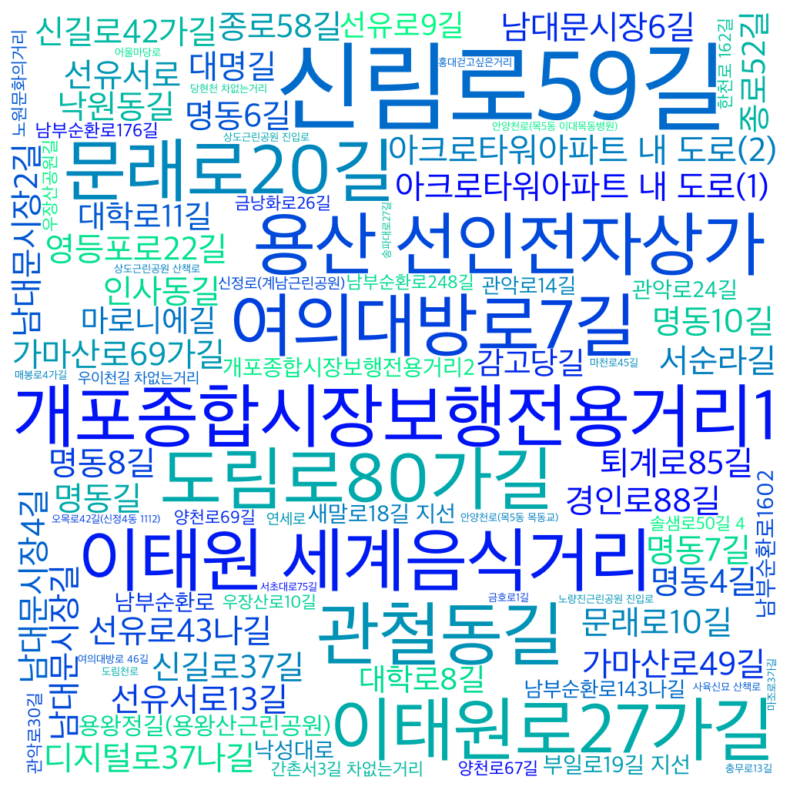

In [111]:
#빈도를 바탕으로 워드클라우드도 그려볼게요 
#head(100)은 상위 100개 단어를 그려달라는 뜻입니다
#숫자 조정을 통해 표현하고 싶은 단어 갯수를 설정할 수 있어요

from wordcloud import WordCloud
wc = WordCloud(font_path = '/Library/Fonts/AppleSDGothicNeo', \
    background_color='white', width=1000, height=1000,\
    colormap = 'winter')
cloud = wc.generate_from_frequencies(road.보행자전용도로명.value_counts())
#cloud = wc.generate_from_frequencies(all_texts.value_counts())
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(cloud, interpolation="bilinear")
plt.show()